<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/Notebooks/MODULO%205/PerceptonMultiplica/DatosPM10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [2]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
url2 ="https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv"
url3 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv"
url4 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/O3_mensual.csv"
url5 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/NO2_mensual.csv"
df = pd.read_csv(url3,usecols=[1])
df2 = pd.read_csv(url3,usecols=[2])
df3 = pd.read_csv(url3,usecols=[3])
df4 = pd.read_csv(url3,usecols=[4])
df5 = pd.read_csv(url3,usecols=[5])

In [3]:
df = df.values
df = df.astype('float32')
df2 = df2.values
df2 = df2.astype('float32')
df3 = df3.values
df3 = df3.astype('float32')
df4 = df4.values
df4 = df4.astype('float32')
df5 = df5.values
df5 = df5.astype('float32')

In [4]:
#noreste_dioxido_de_azufre
train_size = int(len(df)*.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

128 64


In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [6]:
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
52/52 - 21s - loss: 3652.7539
Epoch 2/800
52/52 - 0s - loss: 2773.8525
Epoch 3/800
52/52 - 0s - loss: 2196.8755
Epoch 4/800
52/52 - 0s - loss: 1724.5181
Epoch 5/800
52/52 - 0s - loss: 1349.7595
Epoch 6/800
52/52 - 0s - loss: 1043.2089
Epoch 7/800
52/52 - 0s - loss: 804.2888
Epoch 8/800
52/52 - 0s - loss: 621.3896
Epoch 9/800
52/52 - 0s - loss: 485.4050
Epoch 10/800
52/52 - 0s - loss: 382.3026
Epoch 11/800
52/52 - 0s - loss: 308.5169
Epoch 12/800
52/52 - 0s - loss: 255.6571
Epoch 13/800
52/52 - 0s - loss: 218.6529
Epoch 14/800
52/52 - 0s - loss: 194.2646
Epoch 15/800
52/52 - 0s - loss: 177.5526
Epoch 16/800
52/52 - 0s - loss: 166.7406
Epoch 17/800
52/52 - 0s - loss: 160.2677
Epoch 18/800
52/52 - 0s - loss: 157.4058
Epoch 19/800
52/52 - 0s - loss: 153.2271
Epoch 20/800
52/52 - 0s - loss: 150.3933
Epoch 21/800
52/52 - 0s - loss: 148.0304
Epoch 22/800
52/52 - 0s - loss: 147.1600
Epoch 23/800
52/52 - 0s - loss: 146.5603
Epoch 24/800
52/52 - 0s - loss: 146.1310
Epoch 25/800
52/52

In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 65.36 MSE (8.08 RMSE)
Resultado del test: 266.46 MSE (16.32 RMSE)


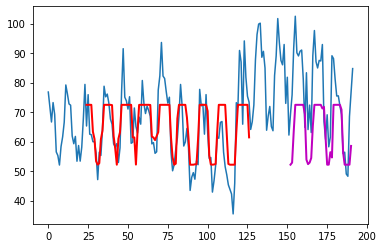

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 999.3563
Epoch 2/800
52/52 - 0s - loss: 573.1476
Epoch 3/800
52/52 - 0s - loss: 380.5489
Epoch 4/800
52/52 - 0s - loss: 253.2555
Epoch 5/800
52/52 - 0s - loss: 171.6667
Epoch 6/800
52/52 - 0s - loss: 122.0559
Epoch 7/800
52/52 - 0s - loss: 93.2458
Epoch 8/800
52/52 - 0s - loss: 77.9285
Epoch 9/800
52/52 - 0s - loss: 70.3379
Epoch 10/800
52/52 - 0s - loss: 66.4563
Epoch 11/800
52/52 - 0s - loss: 65.2965
Epoch 12/800
52/52 - 0s - loss: 64.4370
Epoch 13/800
52/52 - 0s - loss: 63.4936
Epoch 14/800
52/52 - 0s - loss: 63.0327
Epoch 15/800
52/52 - 0s - loss: 61.9078
Epoch 16/800
52/52 - 0s - loss: 60.5478
Epoch 17/800
52/52 - 0s - loss: 60.2068
Epoch 18/800
52/52 - 0s - loss: 58.8590
Epoch 19/800
52/52 - 0s - loss: 59.6973
Epoch 20/800
52/52 - 0s - loss: 59.4888
Epoch 21/800
52/52 - 0s - loss: 59.0931
Epoch 22/800
52/52 - 0s - loss: 55.8744
Epoch 23/800
52/52 - 0s - loss: 55.7204
Epoch 24/800
52/52 - 0s - loss: 53.6334
Epoch 25/800
52/52 - 0s - loss: 53.3

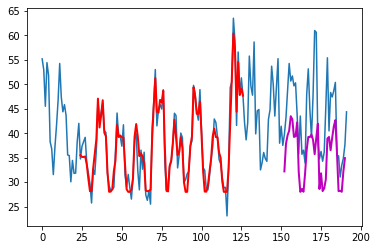

In [10]:
#	suroeste_dioxido_de_azufre
train_size = int(len(df2)*.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:],df2[train_size:len(df2),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df2)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 1941.8898
Epoch 2/800
52/52 - 0s - loss: 1340.6733
Epoch 3/800
52/52 - 0s - loss: 983.6357
Epoch 4/800
52/52 - 0s - loss: 721.7308
Epoch 5/800
52/52 - 0s - loss: 530.2247
Epoch 6/800
52/52 - 0s - loss: 390.5597
Epoch 7/800
52/52 - 0s - loss: 295.0108
Epoch 8/800
52/52 - 0s - loss: 231.9992
Epoch 9/800
52/52 - 0s - loss: 191.9931
Epoch 10/800
52/52 - 0s - loss: 167.1674
Epoch 11/800
52/52 - 0s - loss: 151.8673
Epoch 12/800
52/52 - 0s - loss: 143.1049
Epoch 13/800
52/52 - 0s - loss: 138.1734
Epoch 14/800
52/52 - 0s - loss: 135.6576
Epoch 15/800
52/52 - 0s - loss: 134.4736
Epoch 16/800
52/52 - 0s - loss: 132.9578
Epoch 17/800
52/52 - 0s - loss: 132.2145
Epoch 18/800
52/52 - 0s - loss: 131.5406
Epoch 19/800
52/52 - 0s - loss: 132.8146
Epoch 20/800
52/52 - 0s - loss: 132.3316
Epoch 21/800
52/52 - 0s - loss: 132.6624
Epoch 22/800
52/52 - 0s - loss: 131.9409
Epoch 23/800
52/52 - 0s - loss: 132.6356
Epoch 24/800
52/52 - 0s - loss: 132.0970
Epoch 25/800
52/

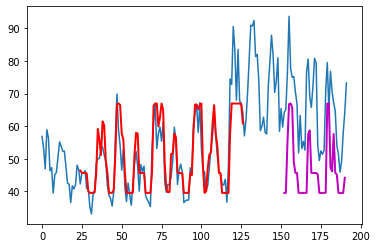

In [11]:
#	noroeste_dioxido_de_azufre
train_size = int(len(df3)*.67)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:],df3[train_size:len(df3),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df3)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df3)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 1579.4489
Epoch 2/800
52/52 - 0s - loss: 1000.4658
Epoch 3/800
52/52 - 0s - loss: 702.2365
Epoch 4/800
52/52 - 0s - loss: 491.3785
Epoch 5/800
52/52 - 0s - loss: 346.4784
Epoch 6/800
52/52 - 0s - loss: 248.2823
Epoch 7/800
52/52 - 0s - loss: 186.3794
Epoch 8/800
52/52 - 0s - loss: 149.4436
Epoch 9/800
52/52 - 0s - loss: 128.5736
Epoch 10/800
52/52 - 0s - loss: 116.6867
Epoch 11/800
52/52 - 0s - loss: 110.2807
Epoch 12/800
52/52 - 0s - loss: 107.3344
Epoch 13/800
52/52 - 0s - loss: 105.7707
Epoch 14/800
52/52 - 0s - loss: 104.8672
Epoch 15/800
52/52 - 0s - loss: 105.3439
Epoch 16/800
52/52 - 0s - loss: 104.8250
Epoch 17/800
52/52 - 0s - loss: 105.0527
Epoch 18/800
52/52 - 0s - loss: 104.9772
Epoch 19/800
52/52 - 0s - loss: 105.0757
Epoch 20/800
52/52 - 0s - loss: 104.7311
Epoch 21/800
52/52 - 0s - loss: 104.9693
Epoch 22/800
52/52 - 0s - loss: 105.0015
Epoch 23/800
52/52 - 0s - loss: 104.0615
Epoch 24/800
52/52 - 0s - loss: 103.6184
Epoch 25/800
52/

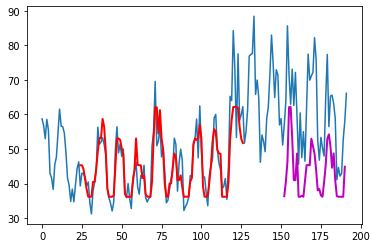

In [12]:
#sureste_dioxido_de_azufre
train_size = int(len(df4)*.67)
test_size = len(df4) - train_size
train, test = df4[0:train_size,:],df4[train_size:len(df4),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df4)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df4)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 1855.4543
Epoch 2/800
52/52 - 0s - loss: 1227.8933
Epoch 3/800
52/52 - 0s - loss: 893.4142
Epoch 4/800
52/52 - 0s - loss: 645.7320
Epoch 5/800
52/52 - 0s - loss: 468.6688
Epoch 6/800
52/52 - 0s - loss: 345.3811
Epoch 7/800
52/52 - 0s - loss: 262.2761
Epoch 8/800
52/52 - 0s - loss: 206.9273
Epoch 9/800
52/52 - 0s - loss: 171.9536
Epoch 10/800
52/52 - 0s - loss: 150.5712
Epoch 11/800
52/52 - 0s - loss: 137.8520
Epoch 12/800
52/52 - 0s - loss: 130.1526
Epoch 13/800
52/52 - 0s - loss: 126.3875
Epoch 14/800
52/52 - 0s - loss: 124.3480
Epoch 15/800
52/52 - 0s - loss: 124.5063
Epoch 16/800
52/52 - 0s - loss: 123.5476
Epoch 17/800
52/52 - 0s - loss: 123.7548
Epoch 18/800
52/52 - 0s - loss: 123.3530
Epoch 19/800
52/52 - 0s - loss: 122.0844
Epoch 20/800
52/52 - 0s - loss: 122.0341
Epoch 21/800
52/52 - 0s - loss: 120.5770
Epoch 22/800
52/52 - 0s - loss: 117.5121
Epoch 23/800
52/52 - 0s - loss: 116.9076
Epoch 24/800
52/52 - 0s - loss: 115.6297
Epoch 25/800
52/

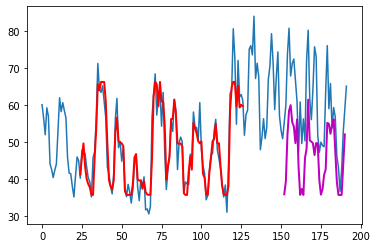

In [13]:
#centro_dioxido_de_azufre
train_size = int(len(df5)*.67)
test_size = len(df5) - train_size
train, test = df5[0:train_size,:],df5[train_size:len(df5),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df5)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df5)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df5)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df5)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

In [14]:
df = pd.read_csv(url)

In [15]:
df

,fecha,noreste_monoxido_de_carbono,suroeste_monoxido_de_carbono,noroeste_monoxido_de_carbono,sureste_monoxido_de_carbono,centro_monoxido_de_carbono
0,2005-01-31,17.379032,17.501344,18.849462,22.038978,22.013441
1,2005-02-28,16.300595,14.505952,16.983631,19.949405,19.897321
2,2005-03-31,15.766129,13.456989,17.076613,17.314516,20.239247
3,2005-04-30,14.031944,14.483333,18.434722,18.925000,21.051389
4,2005-05-31,16.165323,14.461022,16.596774,20.306452,19.369624
...,...,...,...,...,...,...
187,2020-08-31,4.515812,3.047297,4.209270,4.165775,4.095277
188,2020-09-30,4.385783,3.289151,4.452357,4.617134,4.198453
189,2020-10-31,5.784629,3.226774,4.613840,4.910398,5.146353
190,2020-11-30,6.545849,3.615487,4.801608,5.517874,5.510429
